## To Classification whether a person will have diabetes or not.
    

### import libraries

In [1]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier 
# from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

### Data Gathering

In [2]:
df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


# Domain Analysis

1)Pregnancies:-Some women have diabetes before they get pregnant. This is called pregestational diabetes. Other women may get a type of diabetes that only happens in pregnancy. This is called gestational diabetes. Pregnancy can change how a woman's body uses glucose. This can make diabetes worse, or lead to gestational diabetes.
If you have gestational diabetes during pregnancy, generally your blood sugar returns to its usual level soon after delivery. But if you've had gestational diabetes.
The risk of getting diabetes is 28% if the patient has concived more than 2 or 3 times.

2)Glucose:-Glucose is your body's source of fuel. Your pancreas makes insulin to move glucose from your bloodstream into muscle, fat, and liver cells, where your body turns it into energy. People with diabetes have too much blood sugar because their body cannot move glucose into fat, liver, and muscle cells to be changed into and stored for energy.

3)Blood Pressure:-A person with diabetes is twice as likely to have high blood pressure as someone who does not have diabetes. When you have diabetes, high blood sugar can damage your blood vessels and the nerves that help your heart pump.Similarly, high blood pressure can create increased strain on your heart and blood vessels. When these two conditions occur together, they increase the risk of heart disease (cardiovascular disease) and stroke.
Blood pressure should be below 140/80mmHg for people with diabetes or below 130/80mmHg if you have kidney or eye disease or any condition that affects blood vessels and blood supply to the brain.

4)Skin Thickness:-Skin thickening is frequently observed in patients with diabetes. Affected areas of skin can appear thickened, waxy, or edematous. These patients are often asymptomatic but can have a reduction in sensation and pain. Although different parts of the body can be involved, the hands and feet are most frequently involved.Diabetes can cause changes in the small blood vessels. These changes can cause skin problems called diabetic dermopathy. Dermopathy often looks like light brown, scaly patches. These patches may be oval or circular.


5)Insulin:-Insulin is a hormone your pancreas makes to lower blood glucose, or sugar. If you have diabetes, your pancreas either doesn't make enough insulin or your body doesn't respond well to it. Your body needs insulin to keep the blood sugar level in a healthy range.Type 1 diabetes causes damage to the beta cells in your pancreas that make insulin. As a result, your body can't produce enough of this hormone. Type 2 diabetes gradually makes it harder for your be

6)BMI:-Body mass index has a strong relationship to diabetes and insulin resistance. In obese individuals, the amount of nonesterified fatty acids, glycerol, hormones, cytokines, proinflammatory markers, and other substances that are involved in the development of insulin resistance, is increased. The pathogenesis in the development of diabetes is based on the fact that the β-islet cells of the pancreas are impaired, causing a lack of control of blood glucose. The development of diabetes becomes more inevitable if the failure of β-islet cells of the pancreas is accompanied by insulin resistance. Weight gain and body mass are central to the formation and rising incidence of type 1 and type 2 diabetes.

8)Age:-The prevalence of both type 2 diabetes and prediabetes increases with advancing age. The most important factors leading to hyperglycaemia are as follows: deficiency of insulin secretion developing with age, and growing insulin resistance caused by a change in body composition and sarcopaenia.The process of aging of the human body leads to impairment of energy homeostasis and abnormalities in carbohydrate metabolism. The most important causes of hyperglycaemia are thought to be deficiency of insulin secretion developing with age and growing insulin resistance.


# Exploratory data analysis

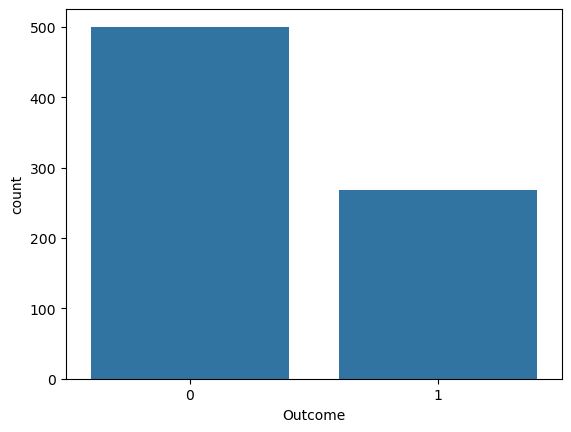

In [5]:
sns.countplot(x='Outcome',data=df)
plt.show()

In [6]:
# Data of non dibities patient is more so data is imbalance. 

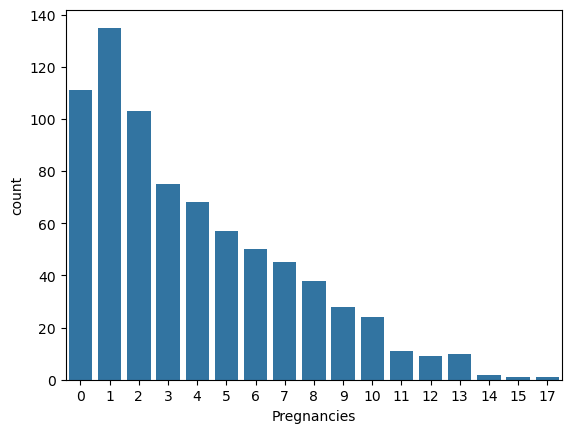

In [7]:
sns.countplot(x='Pregnancies',data=df)
plt.show()

In [8]:
# Maximum patients have conceived 1 and 0 times.

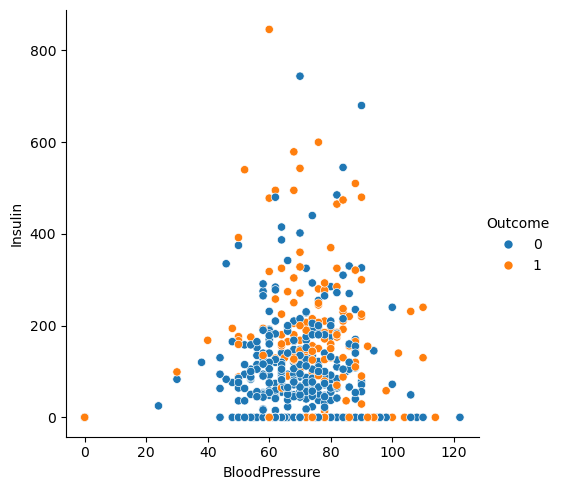

In [9]:
sns.relplot(x='BloodPressure',y='Insulin',hue='Outcome',data=df)
plt.show()

Individuals with an Outcome of 1 (likely diabetic) tend to have higher insulin levels, often above 200.
Those with an Outcome of 0 (non-diabetic) cluster around lower insulin values, generally below 150.

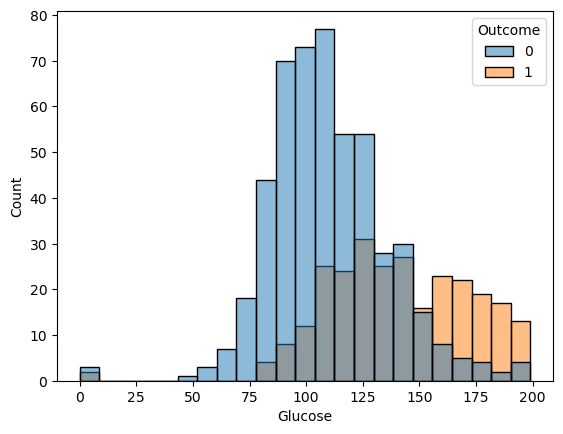

In [10]:
sns.histplot(x='Glucose',hue='Outcome',data=df)
plt.show()

1)In the given data,a person having glucose range till 100 can be considered as they have lesser chance of getting diabetes.

2)If a person have glucose more than 150,higher is the chnace of getting diabetes.



## Data Preprocessing 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [15]:
np.median(df["Glucose"])

117.0

In [16]:
# Handling corrupted data
df["Glucose"] = df["Glucose"].replace({0:np.median(df["Glucose"])})
df["BloodPressure"] = df["BloodPressure"].replace({0:np.median(df["BloodPressure"])})
df["SkinThickness"] = df["SkinThickness"].replace({0:np.median(df["SkinThickness"])})
df["Insulin"] = df["Insulin"].replace({0:np.median(df["Insulin"])})
df["BMI"] = df["BMI"].replace({0:np.median(df["BMI"])})

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

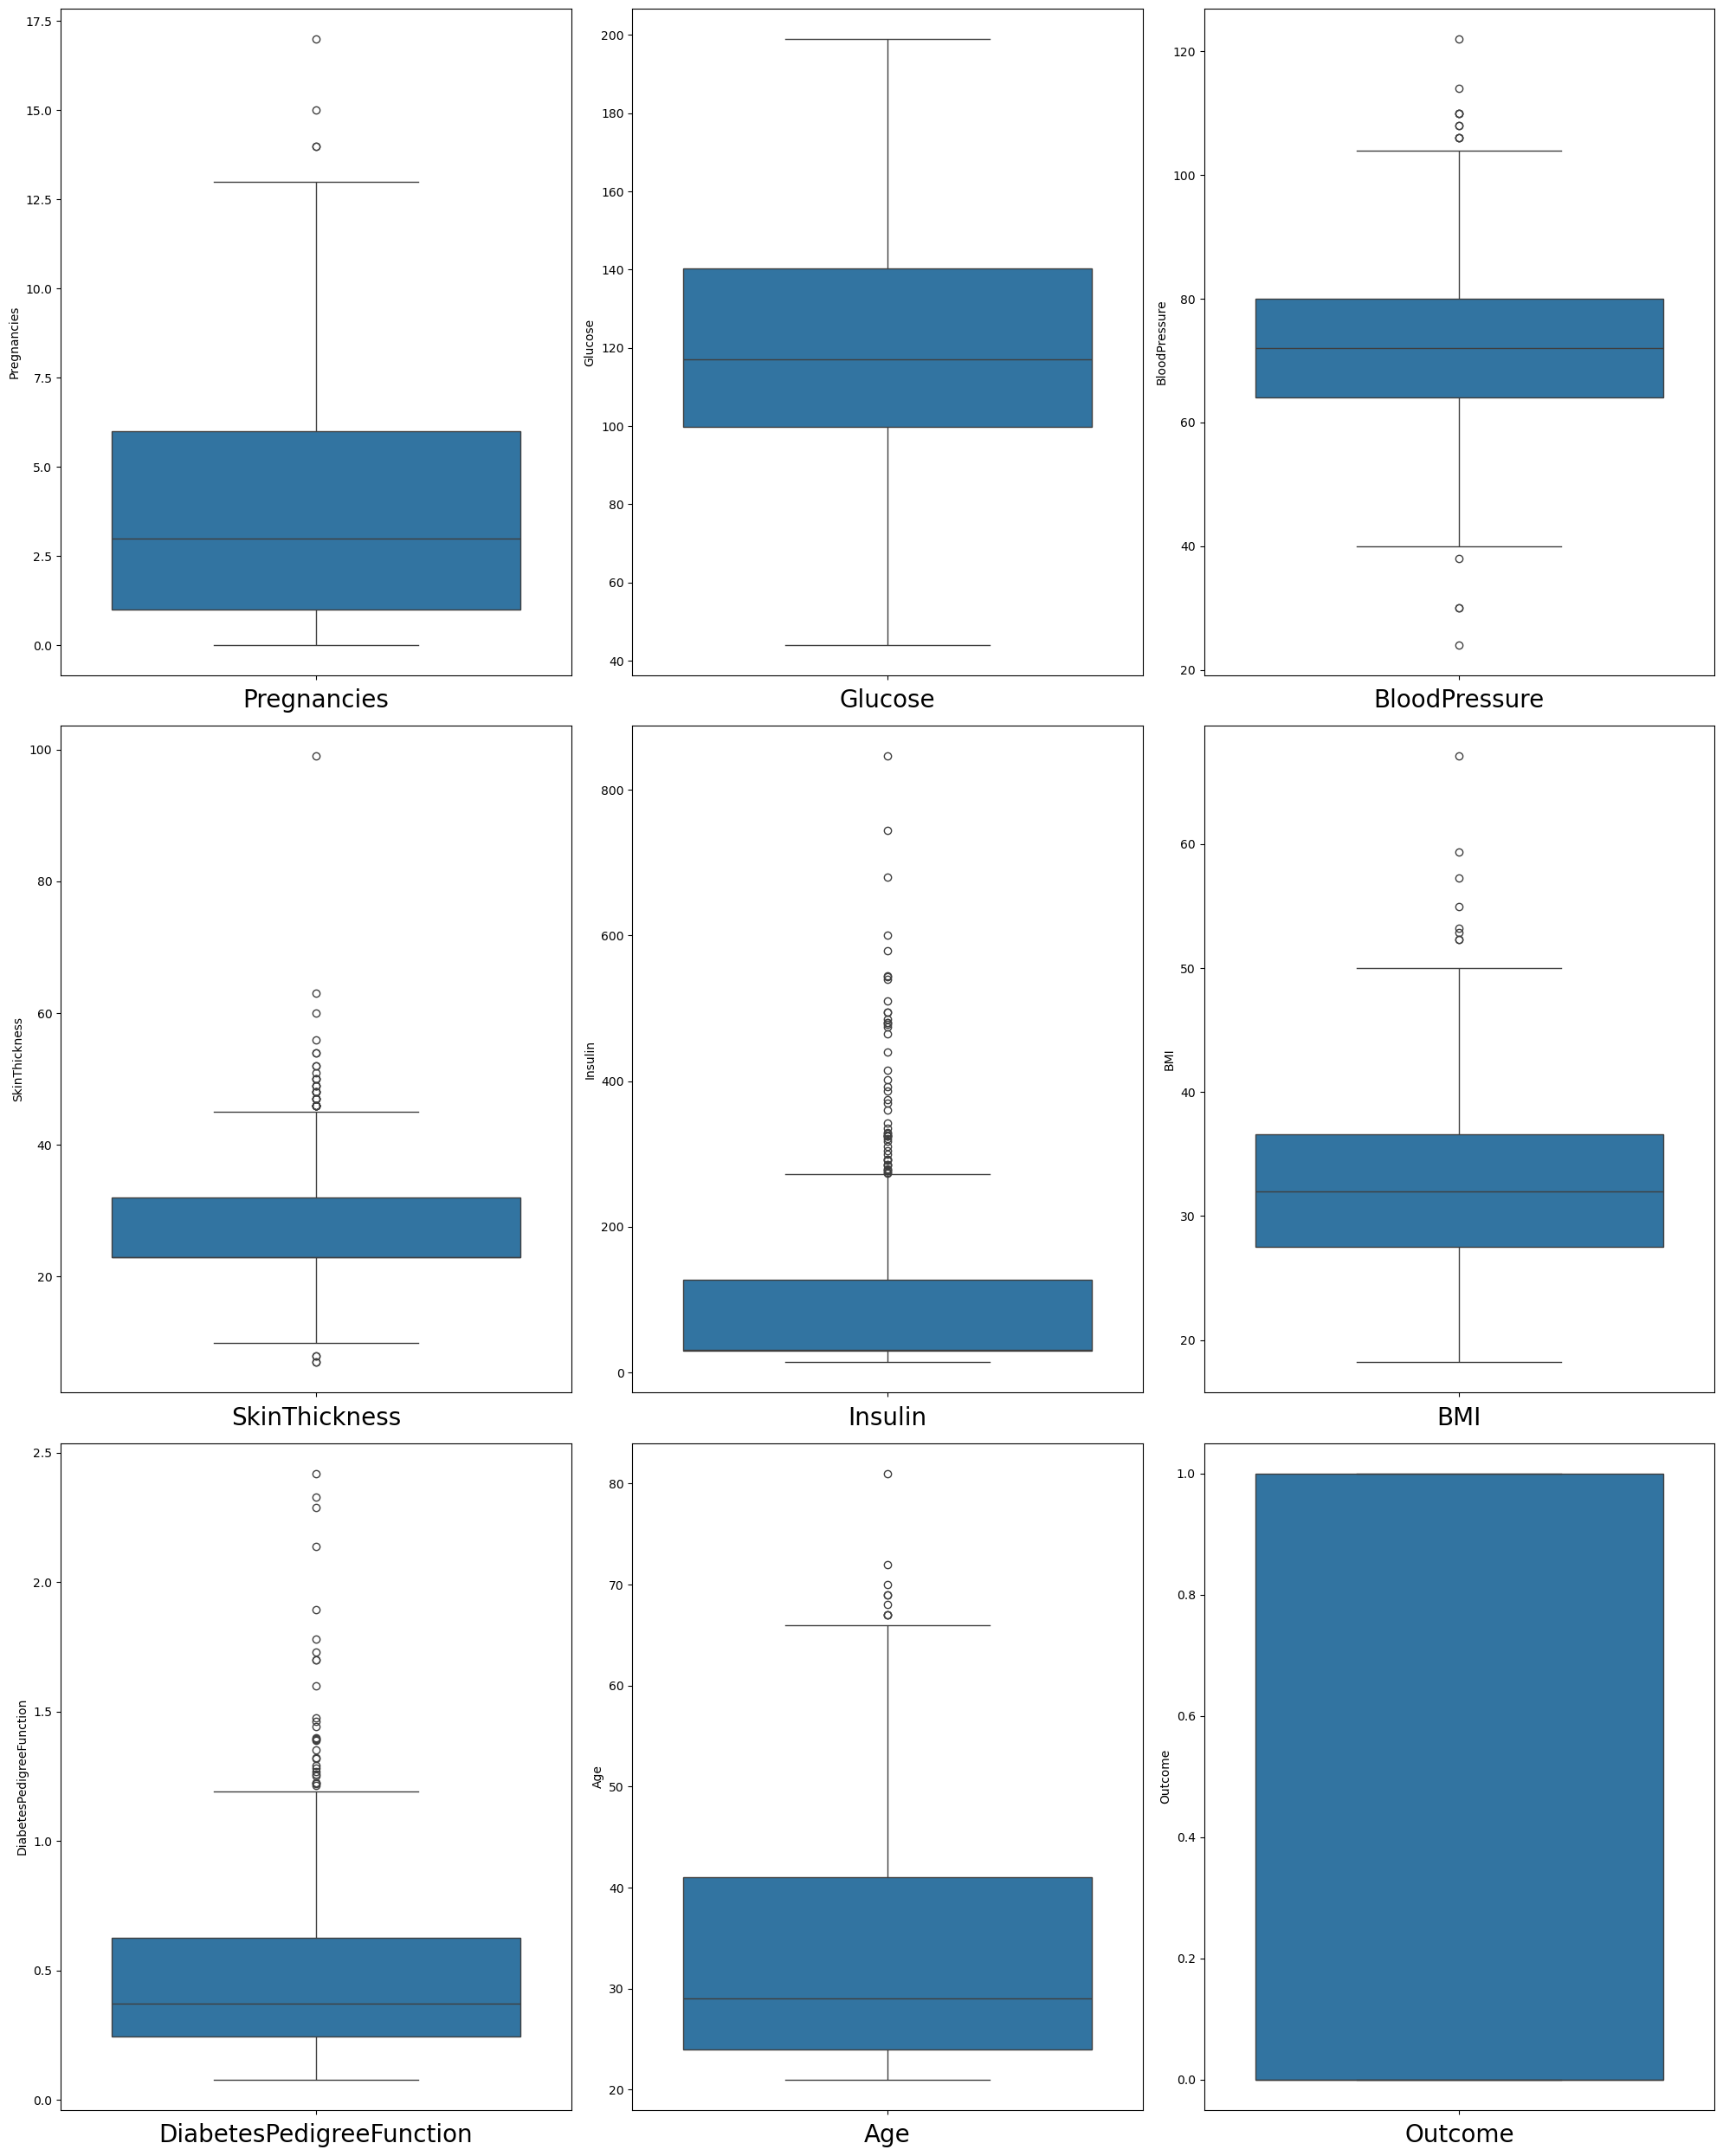

In [18]:
# Checking the outliers
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1

for column in df:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=20)
        #plt.ylabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()        
plt.show()

In [19]:
from scipy import stats
columns = ['Pregnancies','BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age',]  # Replace with your actual column names

for col in columns:
    # Calculate IQR
    IQR = stats.iqr(df[col], interpolation='midpoint')
    
    # Calculate Q1 and Q3
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    
    # Calculate bounds
    lb = Q1 - 1.5 * IQR
    ub = Q3 + 1.5 * IQR
    
    # Print summary
    print(f"\nColumn: {col}")
    print("IQR =", IQR)
    print("Q1 =", Q1)
    print("Q3 =", Q3)
    print("Lower Bound =", lb)
    print("Upper Bound =", ub)
    print("Outliers above upper bound:", len(df.loc[df[col] > ub]))
    print("Outliers below lower bound:", len(df.loc[df[col] < lb]))
    
    # Replace outliers with median
    median_val = np.median(df[col])
    df.loc[(df[col] > ub) | (df[col] < lb), col] = median_val
    print(len(df.loc[(df[col]>ub)|(df[col]<lb)]))
    print("*********************")


Column: Pregnancies
IQR = 5.0
Q1 = 1.0
Q3 = 6.0
Lower Bound = -6.5
Upper Bound = 13.5
Outliers above upper bound: 4
Outliers below lower bound: 0
0
*********************

Column: BloodPressure
IQR = 16.0
Q1 = 64.0
Q3 = 80.0
Lower Bound = 40.0
Upper Bound = 104.0
Outliers above upper bound: 10
Outliers below lower bound: 4
0
*********************

Column: SkinThickness
IQR = 9.0
Q1 = 23.0
Q3 = 32.0
Lower Bound = 9.5
Upper Bound = 45.5
Outliers above upper bound: 31
Outliers below lower bound: 4
0
*********************

Column: Insulin
IQR = 97.0
Q1 = 30.5
Q3 = 127.25
Lower Bound = -115.0
Upper Bound = 272.75
Outliers above upper bound: 49
Outliers below lower bound: 0
0
*********************

Column: BMI
IQR = 9.100000000000001
Q1 = 27.5
Q3 = 36.6
Lower Bound = 13.849999999999998
Upper Bound = 50.25
Outliers above upper bound: 8
Outliers below lower bound: 0
0
*********************

Column: DiabetesPedigreeFunction
IQR = 0.38300000000000006
Q1 = 0.24375
Q3 = 0.62625
Lower Bound = -0.33

In [20]:
# log Transformation
column=['BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age',]
for col in column:
    df[col]=np.log1p(df[col])

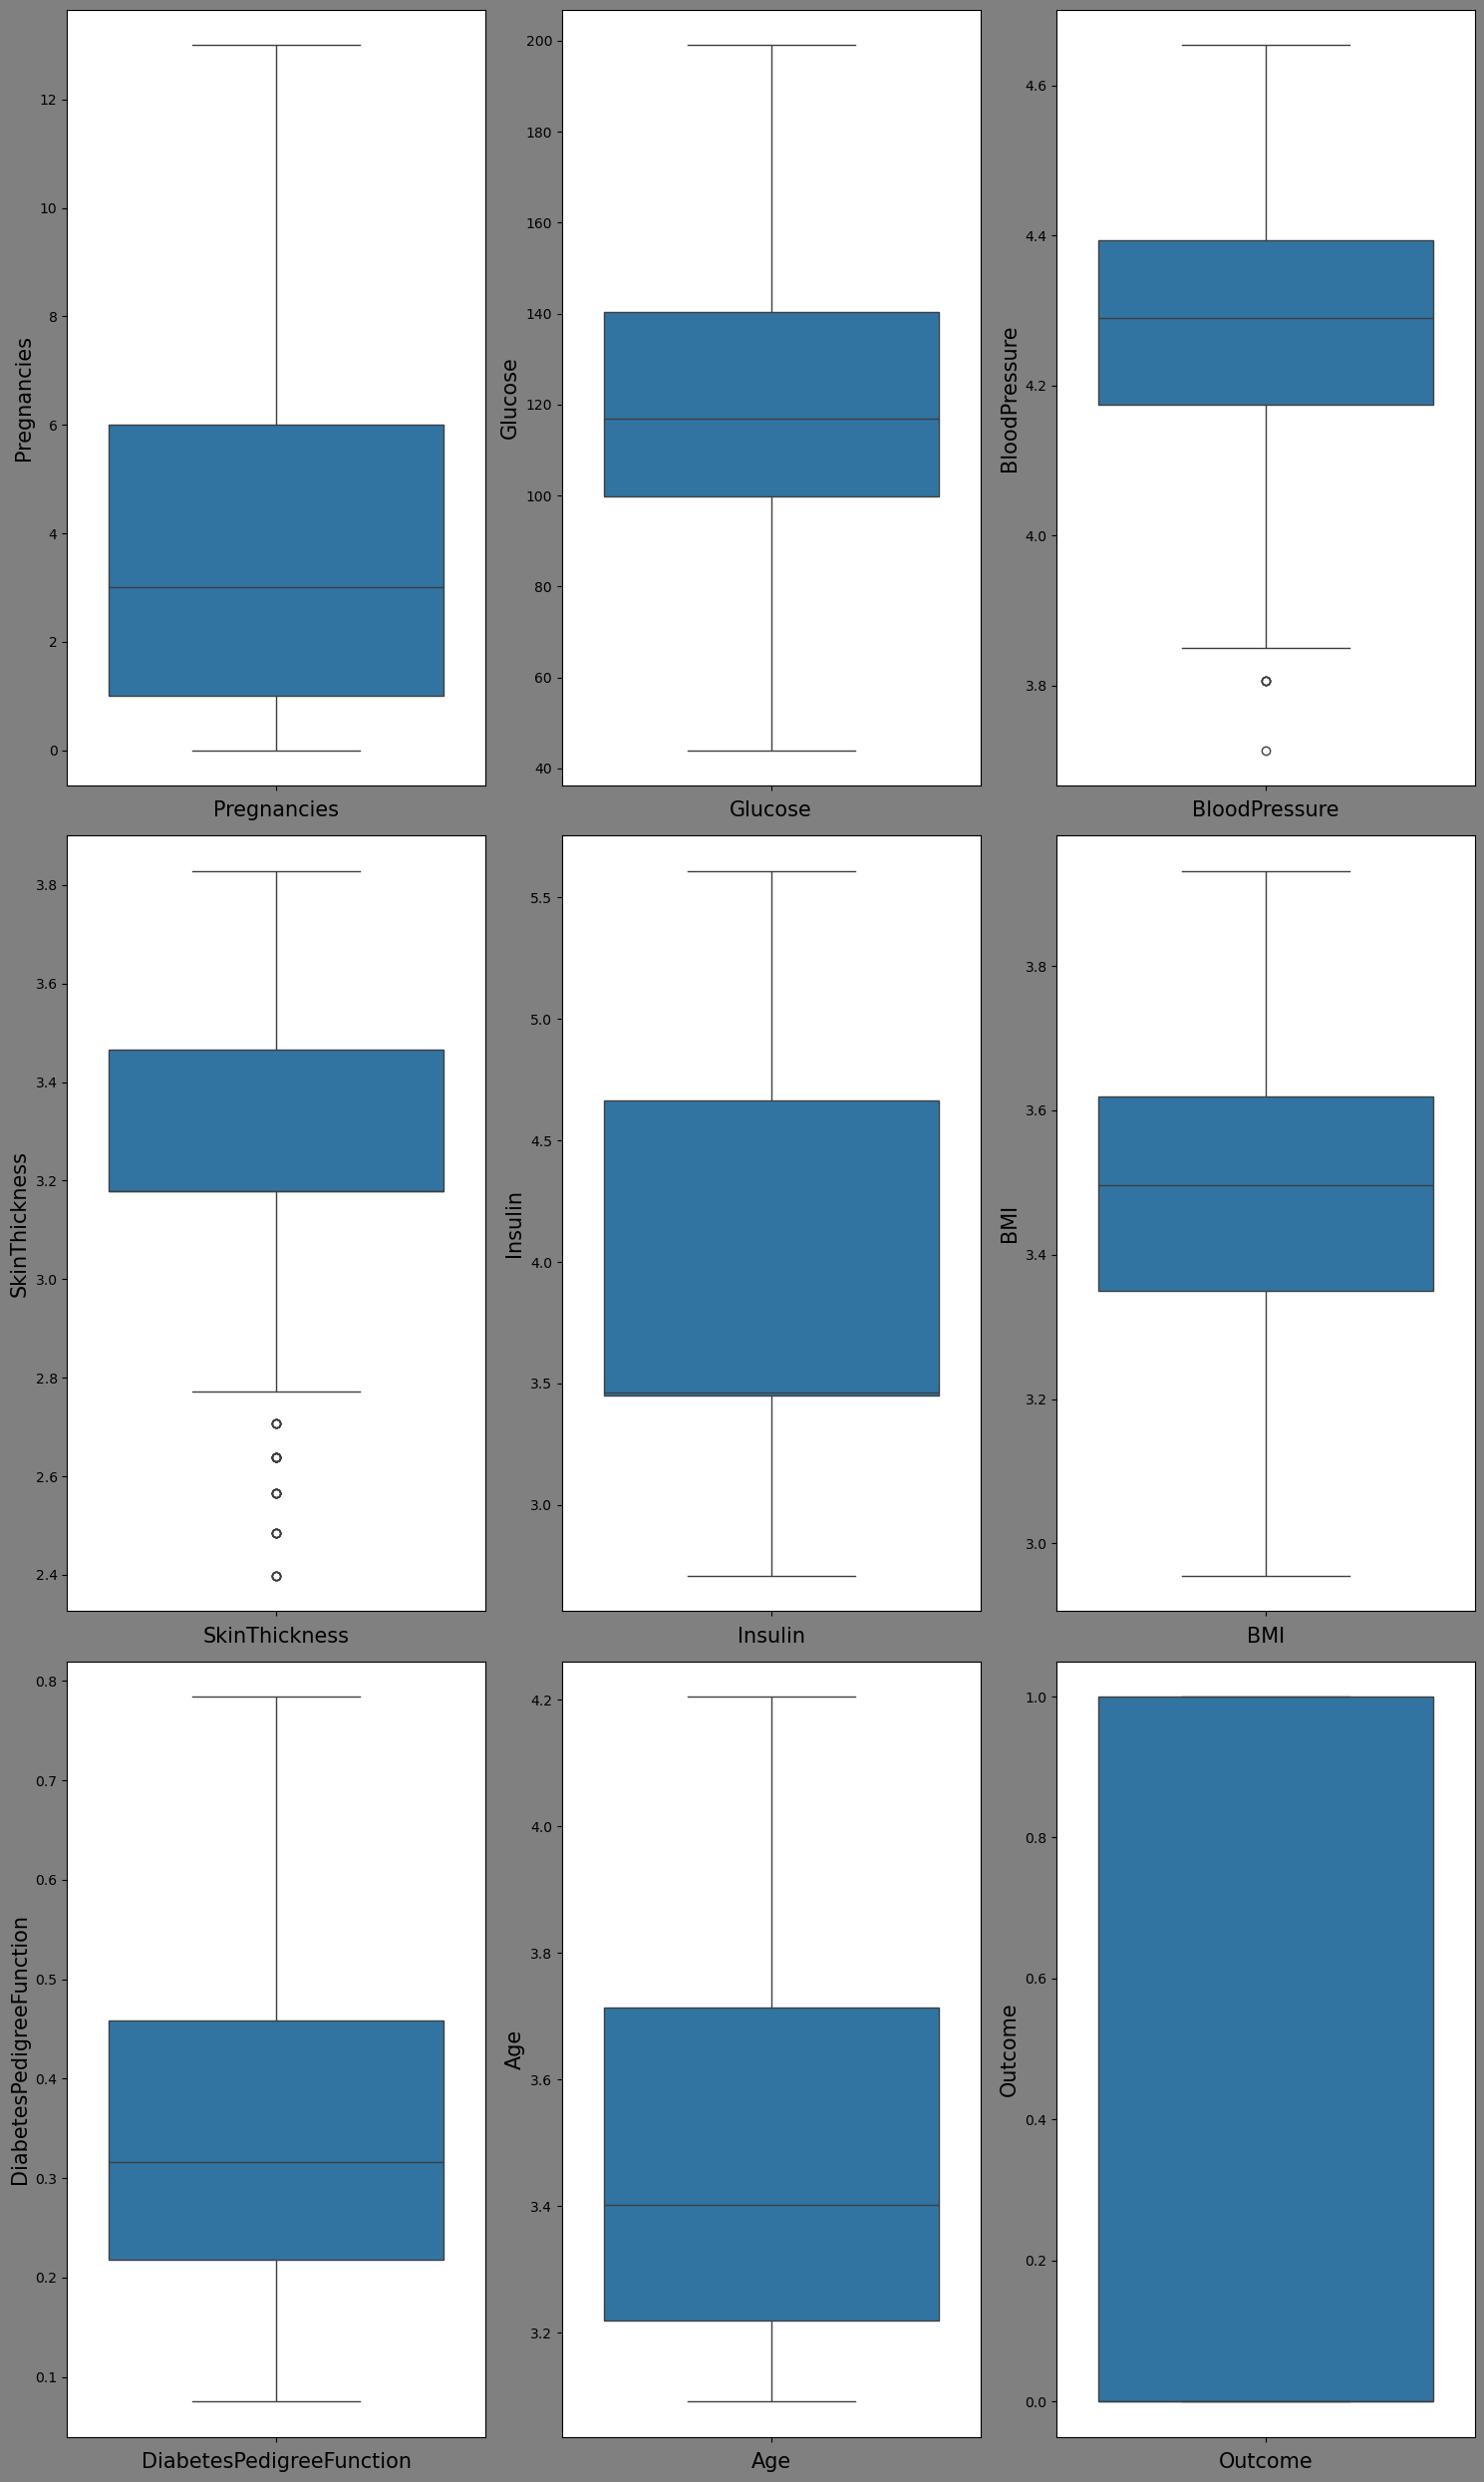

In [21]:
plt.figure(figsize=(15,25),facecolor='Grey')
plotnumber=1
for column in df:
    if plotnumber<=9:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
        plt.ylabel(column,fontsize=15)
        plotnumber+=1
plt.tight_layout()
plt.show()

In [22]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,121.656250,4.280527,3.267957,3.993133,3.483615,0.342356,3.471497,0.348958
std,3.270644,30.438286,0.152859,0.280008,0.708771,0.195982,0.162802,0.301670,0.476951
min,0.000000,44.000000,3.713572,2.397895,2.708050,2.954910,0.075107,3.091042,0.000000
25%,1.000000,99.750000,4.174387,3.178054,3.449988,3.349904,0.218131,3.218876,0.000000
50%,3.000000,117.000000,4.290459,3.178054,3.461753,3.496508,0.316087,3.401197,0.000000
75%,6.000000,140.250000,4.394449,3.465736,4.663439,3.618993,0.458848,3.713572,1.000000
max,13.000000,199.000000,4.653960,3.828641,5.609472,3.931826,0.784358,4.204693,1.000000


In [23]:
## Step 5:-Scaling the data
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dl=['Pregnancies','Outcome']
df1=sc.fit_transform(df.drop(dl,axis=1))

In [24]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [25]:
df1=pd.DataFrame(df1,columns=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age'])

In [26]:
df1.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.501008,0.602895,0.608117,0.442915,0.541198,0.376804,0.341629
std,0.196376,0.162549,0.195707,0.244284,0.200613,0.229541,0.270884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.359677,0.490027,0.545281,0.255715,0.404328,0.201654,0.114788
50%,0.470968,0.613457,0.545281,0.259770,0.554395,0.339767,0.278503
75%,0.620968,0.724038,0.746352,0.673942,0.679775,0.541050,0.558999
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
condf=df[['Pregnancies','Outcome']]

In [28]:
df=pd.concat([condf,df1],axis=1)

In [29]:
df.head()

,Pregnancies,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,1,0.670968,0.613457,0.828675,0.255715,0.602860,0.580374,0.754980
1,1,0,0.264516,0.522253,0.701244,0.255715,0.371481,0.318276,0.336455
2,8,1,0.896774,0.490027,0.545281,0.255715,0.241133,0.618841,0.364087
3,1,0,0.290323,0.522253,0.545281,0.636180,0.425654,0.111849,0.000000
4,0,1,0.600000,0.000000,0.828675,0.834711,0.851199,0.340537,0.390893


In [30]:
df.describe()

,Pregnancies,Outcome,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.782552,0.348958,0.501008,0.602895,0.608117,0.442915,0.541198,0.376804,0.341629
std,3.270644,0.476951,0.196376,0.162549,0.195707,0.244284,0.200613,0.229541,0.270884
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.359677,0.490027,0.545281,0.255715,0.404328,0.201654,0.114788
50%,3.000000,0.000000,0.470968,0.613457,0.545281,0.259770,0.554395,0.339767,0.278503
75%,6.000000,1.000000,0.620968,0.724038,0.746352,0.673942,0.679775,0.541050,0.558999
max,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
X = df.drop('Outcome', axis=1)   #df.iloc[:,:-1]
y = df['Outcome']

In [32]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,0.670968,0.613457,0.828675,0.255715,0.602860,0.580374,0.754980
1,1,0.264516,0.522253,0.701244,0.255715,0.371481,0.318276,0.336455
2,8,0.896774,0.490027,0.545281,0.255715,0.241133,0.618841,0.364087
3,1,0.290323,0.522253,0.545281,0.636180,0.425654,0.111849,0.000000
4,0,0.600000,0.000000,0.828675,0.834711,0.851199,0.340537,0.390893
...,...,...,...,...,...,...,...,...
763,10,0.367742,0.670184,0.545281,0.858354,0.581939,0.116673,0.958865
764,2,0.503226,0.583916,0.653022,0.255715,0.693406,0.306749,0.216551
765,5,0.496774,0.613457,0.545281,0.695982,0.356537,0.203071,0.307947
766,1,0.529032,0.422487,0.545281,0.255715,0.493694,0.316187,0.700542


In [33]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [34]:
y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Split Data

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=42)

In [36]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,0.258065,0.613457,0.545281,0.255715,0.554395,0.268352,0.000000
618,9,0.438710,0.749976,0.573813,0.255715,0.429166,0.340537,0.754980
346,1,0.612903,0.145233,0.417850,0.593766,0.446545,0.603580,0.039915
294,0,0.754839,0.232089,0.545281,0.255715,0.180391,0.213226,0.986497
231,6,0.580645,0.724038,0.866465,0.263825,0.920739,0.195121,0.681637
...,...,...,...,...,...,...,...,...
71,5,0.612903,0.490027,0.828675,0.772280,0.443093,0.379543,0.183895
106,1,0.335484,0.613457,0.545281,0.255715,0.202500,0.159366,0.216551
270,10,0.367742,0.800027,0.866465,0.255715,0.907643,0.964155,0.514092
435,0,0.625806,0.613457,0.545281,0.255715,0.834821,0.157028,0.278503


In [37]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
668,6,0.348387,0.387037,0.788725,0.876888,0.614626,0.398402,0.622410
324,2,0.438710,0.656283,0.767860,0.255715,0.663176,0.088705,0.000000
624,2,0.412903,0.490027,0.545281,0.255715,0.516479,0.100933,0.000000
690,8,0.406452,0.724038,0.545281,0.255715,0.294480,0.766043,0.416922
473,7,0.593548,0.847828,0.545281,0.255715,0.487090,0.162866,0.754980
...,...,...,...,...,...,...,...,...
355,9,0.780645,0.824196,0.545281,0.255715,0.503521,0.266188,0.737198
534,1,0.212903,0.350365,0.724162,0.460120,0.593946,0.340537,0.114788
344,8,0.329032,0.613457,0.545281,0.255715,0.693406,0.451614,0.870471
296,2,0.658065,0.583916,0.884620,0.263825,0.422130,0.303589,0.278503


In [38]:
len(X_train)

614

In [39]:
len(y_test)

154

In [40]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

In [41]:
y_train.value_counts()

Outcome
0    401
1    213
Name: count, dtype: int64

In [42]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

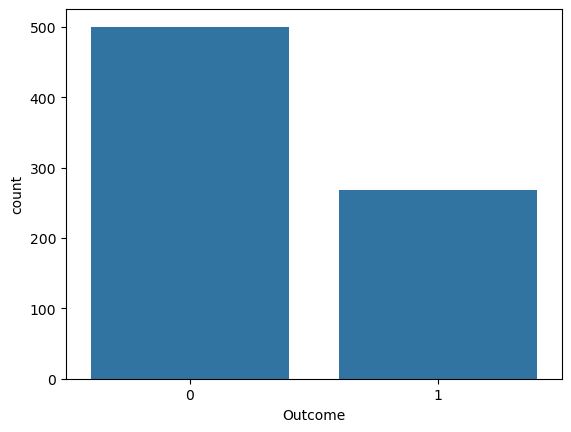

In [43]:
sns.countplot(x=df['Outcome'])
plt.show()

In [44]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_smote,y_smote=smote.fit_resample(X_train,y_train)

In [45]:
from collections import Counter
print("Actualclasses",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actualclasses Counter({0: 401, 1: 213})
SMOTE Classes Counter({0: 401, 1: 401})


In [46]:
y_train

60     0
618    1
346    0
294    0
231    1
      ..
71     0
106    0
270    1
435    1
102    0
Name: Outcome, Length: 614, dtype: int64

### Build Decision Tree Model

In [47]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_smote, y_smote)

DecisionTreeClassifier()

#### Testing Data Accuarcy

In [48]:
y_pred_test = dt_model.predict(X_test)
# y_pred_test[10:15]

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7142857142857143

Classification report is
               precision    recall  f1-score   support

           0       0.78      0.77      0.78        99
           1       0.60      0.62      0.61        55

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.71      0.72       154


Confusion matrix
 [[76 23]
 [21 34]]


In [49]:
74+36+25+19

154

In [50]:
(75+40)/154

0.7467532467532467

In [51]:
y_test[10:15]

667    1
212    0
199    1
265    0
760    0
Name: Outcome, dtype: int64

In [52]:
y_pred_test[10:15]

array([0, 0, 1, 1, 0], dtype=int64)

#### Training data accuracy

In [53]:
y_pred_train = dt_model.predict(x_smote)
# y_pred_train[10:15]

train_accuracy = accuracy_score(y_smote, y_pred_train)
print("Training accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_smote, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_smote, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Training accuracy is : 1.0

Classification report is
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       401
           1       1.00      1.00      1.00       401

    accuracy                           1.00       802
   macro avg       1.00      1.00      1.00       802
weighted avg       1.00      1.00      1.00       802


Confusion matrix
 [[401   0]
 [  0 401]]


#### Plot Decision Tree

In [54]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=dt_model, feature_names=X.columns,class_names=['0', '1'], filled=True)
plt.savefig("DT_diabetes123.png")

### HyperParameter Tuning

#### 1. GridSearchCV()

In [55]:
hyperparameters = {'criterion' : ["gini", "entropy"],
                   'max_depth' : np.arange(2,10),
                   'min_samples_split': np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)
                  }
dt_model = DecisionTreeClassifier()
gscv_dt_model = GridSearchCV(dt_model, hyperparameters, cv=5)
gscv_dt_model.fit(x_smote, y_smote)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [56]:
gscv_dt_model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 9}

In [57]:
best_model = DecisionTreeClassifier(criterion= 'entropy',
                     max_depth= 5,
                     min_samples_leaf= 4,
                        min_samples_split= 4)
best_model.fit(x_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=4,
                       min_samples_split=4)

#### Testing Data Accuarcy

In [58]:
y_pred_test = best_model.predict(X_test)
y_pred_test[10:15]

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7207792207792207

Classification report is
               precision    recall  f1-score   support

           0       0.82      0.73      0.77        99
           1       0.59      0.71      0.64        55

    accuracy                           0.72       154
   macro avg       0.70      0.72      0.71       154
weighted avg       0.74      0.72      0.73       154


Confusion matrix
 [[72 27]
 [16 39]]


#### Training data accuracy

In [59]:
y_pred_train = best_model.predict(x_smote)
y_pred_train[10:15]

train_accuracy = accuracy_score(y_smote, y_pred_train)
print("Training accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_smote, y_pred_train)
print("Classification report is\n", clf_report)
print()
conf_matrix = confusion_matrix(y_smote, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Training accuracy is : 0.8416458852867831

Classification report is
               precision    recall  f1-score   support

           0       0.88      0.79      0.83       401
           1       0.81      0.90      0.85       401

    accuracy                           0.84       802
   macro avg       0.85      0.84      0.84       802
weighted avg       0.85      0.84      0.84       802


Confusion matrix
 [[316  85]
 [ 42 359]]


#### Plot Decision Tree_GridSearchCV

In [60]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=best_model, feature_names=df.columns,
                 class_names=['0', '1'], filled=True)
plt.savefig("DT_diabetes_gscv.png")

#### 2. RandomizedSearchCv()

In [61]:
hyperparameters = {'criterion' : ["gini", "entropy"],
                   'max_depth' : np.arange(2,7),
                   'min_samples_split': np.arange(2,10),
                   "min_samples_leaf" : np.arange(2,10)
                  }
dt_model = DecisionTreeClassifier()
rscv_dt_model = RandomizedSearchCV(dt_model, hyperparameters, cv=5)
rscv_dt_model.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [62]:
rscv_dt_model.best_params_

{'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_depth': 4,
 'criterion': 'gini'}

In [63]:
best_model1 = DecisionTreeClassifier(criterion= "entropy",
                     max_depth= 5,
                     min_samples_leaf= 8,
                        min_samples_split= 6)
best_model1.fit(x_smote, y_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=8,
                       min_samples_split=6)

#### Testing Data Accuarcy

In [64]:
y_pred_test = best_model1.predict(X_test)
y_pred_test[10:15]

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7272727272727273

Classification report is
               precision    recall  f1-score   support

           0       0.83      0.73      0.77        99
           1       0.60      0.73      0.66        55

    accuracy                           0.73       154
   macro avg       0.71      0.73      0.71       154
weighted avg       0.75      0.73      0.73       154


Confusion matrix
 [[72 27]
 [15 40]]


#### Training data accuracy

In [65]:
y_pred_train = best_model1.predict(x_smote)
# y_pred_train[10:15]

test_accuracy = accuracy_score(y_smote, y_pred_train)
print("Testing accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_smote, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_smote, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.8416458852867831

Classification report is
               precision    recall  f1-score   support

           0       0.87      0.80      0.83       401
           1       0.81      0.88      0.85       401

    accuracy                           0.84       802
   macro avg       0.84      0.84      0.84       802
weighted avg       0.84      0.84      0.84       802


Confusion matrix
 [[320  81]
 [ 48 353]]


#### Plot Decision Tree_Randomized SearchCV

In [66]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=best_model, feature_names=df.columns,class_names=['0', '1'], filled=True)
plt.savefig("DT_diabetes_rscv.png")

### Pruning

In [67]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.0)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
values = dt_model.cost_complexity_pruning_path(X_train, y_train)
# print(values, len(values))
ccp_alphas = values['ccp_alphas']
ccp_alphas, len(ccp_alphas)

(array([0.        , 0.00135722, 0.00142508, 0.0014658 , 0.00150338,
        0.00151233, 0.00154723, 0.0015608 , 0.0015608 , 0.0015608 ,
        0.00156834, 0.00157438, 0.00180963, 0.00193143, 0.0020242 ,
        0.00205386, 0.00208803, 0.00213717, 0.00217155, 0.00217155,
        0.00217155, 0.00217155, 0.00217155, 0.00217155, 0.002443  ,
        0.00247989, 0.00252229, 0.0025563 , 0.00260586, 0.00271444,
        0.00271908, 0.00285016, 0.00287188, 0.00287411, 0.00309446,
        0.00323136, 0.00324047, 0.00339305, 0.0034202 , 0.0035195 ,
        0.00355828, 0.00367087, 0.00375034, 0.00381427, 0.00397394,
        0.00399023, 0.00409007, 0.00446613, 0.00472895, 0.00481013,
        0.00532297, 0.00637059, 0.00826586, 0.0096877 , 0.01545397,
        0.01582626, 0.02314169, 0.02322126, 0.08048715]),
 59)

In [69]:
len(ccp_alphas)

59

In [70]:
train_accuracy = []
test_accuracy = []
for ccp_alpha in ccp_alphas:
    dt_model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=10)
    dt_model.fit(X_train, y_train)
    train_accuracy.append(dt_model.score(X_train, y_train))
    test_accuracy.append(dt_model.score(X_test, y_test))

In [71]:
train_accuracy

[1.0,
 0.996742671009772,
 0.995114006514658,
 0.993485342019544,
 0.99185667752443,
 0.990228013029316,
 0.988599348534202,
 0.9837133550488599,
 0.9837133550488599,
 0.9837133550488599,
 0.9820846905537459,
 0.9804560260586319,
 0.9804560260586319,
 0.9771986970684039,
 0.9723127035830619,
 0.9690553745928339,
 0.9690553745928339,
 0.9657980456026058,
 0.9543973941368078,
 0.9543973941368078,
 0.9543973941368078,
 0.9543973941368078,
 0.9543973941368078,
 0.9511400651465798,
 0.9462540716612378,
 0.9462540716612378,
 0.9234527687296417,
 0.9185667752442996,
 0.9153094462540716,
 0.9136807817589576,
 0.9104234527687296,
 0.9087947882736156,
 0.9071661237785016,
 0.9039087947882736,
 0.9022801302931596,
 0.9006514657980456,
 0.8941368078175895,
 0.8908794788273615,
 0.8859934853420195,
 0.8794788273615635,
 0.8745928338762216,
 0.8713355048859935,
 0.8680781758957655,
 0.8615635179153095,
 0.8485342019543974,
 0.8452768729641694,
 0.8420195439739414,
 0.8420195439739414,
 0.83876221498

In [72]:
len(train_accuracy)

59

In [73]:
max(train_accuracy)

1.0

In [74]:
test_accuracy

[0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7012987012987013,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7142857142857143,
 0.7012987012987013,
 0.6948051948051948,
 0.6948051948051948,
 0.6948051948051948,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.6883116883116883,
 0.6948051948051948,
 0.6948051948051948,
 0.7272727272727273,
 0.7272727272727273,
 0.7272727272727273,
 0.7207792207792207,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7077922077922078,
 0.7142857142857143,
 0.7142857142857143,
 0.7272727272727273,
 0.7337662337662337,
 0.7337662337662337,
 0.7337662337662337,
 0.7467532467532467,
 0.7402597402597403,
 0.7402597402597403,
 0.7467532467532467,
 0.7467532467

In [75]:
max(test_accuracy)

0.7727272727272727

In [76]:
test_accuracy.index(max(test_accuracy))

54

In [77]:
train_accuracy[49]

0.8322475570032574

In [78]:
ccp_alphas[49]

0.004810134368024358

In [79]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas, train_accuracy, label = "Train")
ax.plot(ccp_alphas, test_accuracy, label = "Test")
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuarcy")
ax.legend()

#### Model Building Pruning

In [80]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.023110974050588207)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.023110974050588207)

#### Test data accuracy_After Pruning

In [81]:
y_pred_test = dt_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred_test)
print("Testing accuracy is :", test_accuracy)
print()
clf_report = classification_report(y_test, y_pred_test)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_test, y_pred_test)
print("Confusion matrix\n", conf_matrix)

Testing accuracy is : 0.7727272727272727

Classification report is
               precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154


Confusion matrix
 [[87 12]
 [23 32]]


#### Train data accuracy_After Pruning

In [82]:
y_pred_train = dt_model.predict(X_train)

train_accuracy = accuracy_score(y_train, y_pred_train)
print("Training accuracy is :", train_accuracy)
print()
clf_report = classification_report(y_train, y_pred_train)
print("Classification report is\n", clf_report)
print()

conf_matrix = confusion_matrix(y_train, y_pred_train)
print("Confusion matrix\n", conf_matrix)

Training accuracy is : 0.7703583061889251

Classification report is
               precision    recall  f1-score   support

           0       0.79      0.89      0.83       401
           1       0.72      0.55      0.63       213

    accuracy                           0.77       614
   macro avg       0.75      0.72      0.73       614
weighted avg       0.76      0.77      0.76       614


Confusion matrix
 [[355  46]
 [ 95 118]]


#### Plot Decision Tree for Pruning

In [83]:
plt.figure(figsize=(200,100))
tree = plot_tree(decision_tree=dt_model, feature_names=df.columns,
                class_names=['0', '1'], filled=True)
plt.savefig("DT_diabetes_CCP.png")